In [1]:
import morphs
%matplotlib inline
import seaborn as sns

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
accuracies, cluster_accuracies = morphs.data.load.cluster_accuracies()
good_recs = morphs.data.accuracies.good_recs(cluster_accuracies)

In [3]:
# try to find nice block used below, else use last one found
for block_path in morphs.paths.blocks():
    if 'Pen01_Lft_AP2500_ML750__Site04_Z2300__B1101_cat_P01_S04_3' in block_path:
        break
subj = morphs.data.parse.bird_id(block_path)
good_clusters = morphs.data.accuracies.good_clusters(cluster_accuracies[block_path])

In [4]:
spikes = morphs.data.load.ephys_data(block_path, good_clusters=good_clusters, shuffle_endpoints=True)

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
X, labels = morphs.spikes.create_neural_rep(spikes, max_id_len=5)
X_red = morphs.data.neurometric.logistic_dim_reduction(X, labels)
psychometric_params = morphs.data.load.psychometric_params()

In [6]:
behavior_subj = 'B1218'

In [7]:
sns.set_context("talk")
folder = morphs.paths.FIGURES_DIR / 'neurometrics'

/usr/local/home/mthielk/GitHub/morphs/morphs/plot/neurometric.py:9: RuntimeWarning: overflow encountered in exp
  return A + (K - A) / (1 + np.exp(-B * (x - M)))


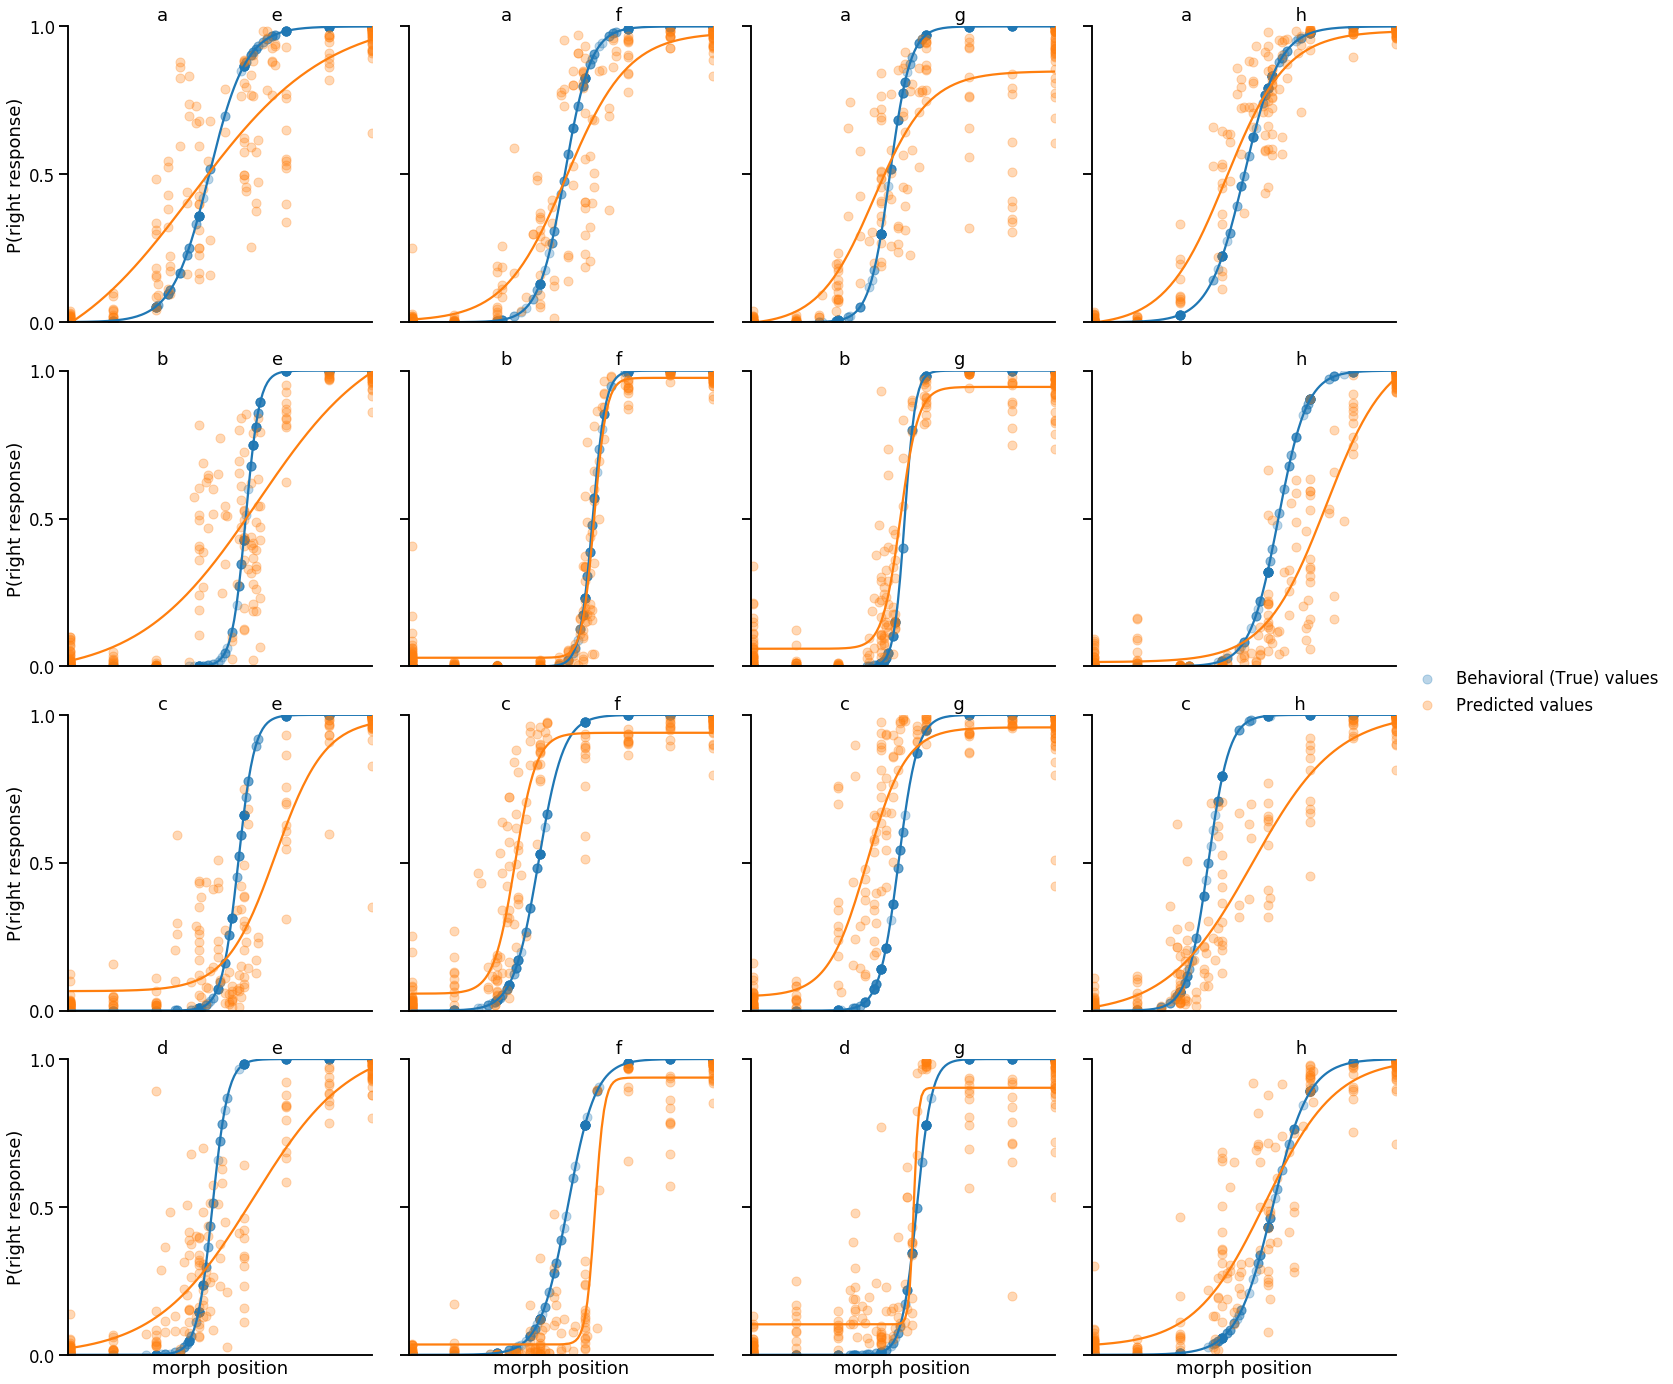

In [8]:
held_out_df, g = morphs.plot.neurometric.held_out(labels, X_red, behavior_subj, psychometric_params)
morphs.plot.savefig(g, 'neurometric-sample', folder=folder)